In [237]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

%config InlineBackend.figure_format = 'svg'

## 读取数据

In [238]:
data = pd.read_csv('2.csv')
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
3,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
4,Adelie,Torgersen,39.3,20.6,190,3650,MALE
...,...,...,...,...,...,...,...
337,Gentoo,Biscoe,47.2,13.7,214,4925,FEMALE
338,Gentoo,Biscoe,46.8,14.3,215,4850,FEMALE
339,Gentoo,Biscoe,50.4,15.7,222,5750,MALE
340,Gentoo,Biscoe,45.2,14.8,212,5200,FEMALE


## 数据清洗

In [252]:
# 处理数据：删除异常数据、保留需要的数据、将字符串映射为数字
my_data = data.dropna()
fv_col = ['species', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
my_data = my_data.loc[:, fv_col]
my_data['species'] = my_data['species'].map({'Adelie': 1, 'Chinstrap': 2, 'Gentoo': 3})
my_data

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,1,39.1,18.7,181,3750
1,1,39.5,17.4,186,3800
2,1,40.3,18.0,195,3250
3,1,36.7,19.3,193,3450
4,1,39.3,20.6,190,3650
...,...,...,...,...,...
337,3,47.2,13.7,214,4925
338,3,46.8,14.3,215,4850
339,3,50.4,15.7,222,5750
340,3,45.2,14.8,212,5200


In [253]:
# 标准化数据
scaler = StandardScaler()
x = np.array(my_data.loc[:, fv_col])
x = scaler.fit_transform(x)
y = np.array(my_data['species'])

In [254]:
x

array([[-1.03437424, -0.89604189,  0.7807321 , -1.42675157, -0.56847478],
       [-1.03437424, -0.82278787,  0.11958397, -1.06947358, -0.50628618],
       [-1.03437424, -0.67627982,  0.42472926, -0.42637319, -1.1903608 ],
       ...,
       [ 1.21691087,  1.17338426, -0.74499437,  1.50292796,  1.91906927],
       [ 1.21691087,  0.22108196, -1.20271231,  0.78837197,  1.23499466],
       [ 1.21691087,  1.08181673, -0.54156417,  0.85982757,  1.48374906]])

In [250]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

## 划分训练集和测试集，创建SVM模型并训练

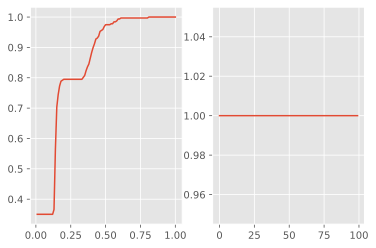

In [259]:
# 划分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=18, test_size=0.95)
scores = []
c = 1
fig = plt.figure()

# 筛选合适的模型
for i in np.linspace(0.01, 1, 100):
    # 创建SVM模型
    model = SVC(C=i, kernel='rbf', gamma='auto')
    clf = model.fit(x_train, y_train)
    # print(model.score(x_test, y_test))
    scores.append(model.score(x_test, y_test))
ax = fig.add_subplot(1, 2, 1)
ax.plot(np.linspace(0.01, 1, 100), scores)
for i in np.linspace(1, 100, 100):
    # 创建SVM模型
    model = SVC(C=i, kernel='rbf', gamma='auto')
    clf = model.fit(x_train, y_train)
    # print(model.score(x_test, y_test))
    scores.append(model.score(x_test, y_test))
ax = fig.add_subplot(1, 2, 2)
ax.plot(scores[100:])

In [260]:
# 创建SVM模型
model = SVC(C=1, kernel='rbf')
clf = model.fit(x_train, y_train)
print(model.score(x_test, y_test))

1.0


In [261]:
# 预测错误的值
res_df = pd.DataFrame(np.concatenate((y_test.reshape(-1, 1), model.predict(x_test).reshape(-1, 1)), axis=1),
                      columns=['预测值', '真实值'])
res_df = res_df[res_df['预测值'] != res_df['真实值']]
res_df['预测值'] = res_df['预测值'].map({1: 'Adelie', 2: 'Chinstrap', 3: 'Gentoo'})
res_df['真实值'] = res_df['真实值'].map({1: 'Adelie', 2: 'Chinstrap', 3: 'Gentoo'})
res_df

,预测值,真实值
